In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

In [2]:
TFile *file = TFile::Open("muon.root");

In [3]:
TTree *tree = (TTree*) file->Get("T");
tree->Print()


******************************************************************************
*Tree    :T         : ev1 Tree                                               *
*Entries :    10000 : Total =          365912 bytes  File  Size =     288915 *
*        :          : Tree compression factor =   1.25                       *
******************************************************************************
*Br    0 :event     : Float_t Event                                          *
*Entries :    10000 : Total  Size=      40621 bytes  File Size  =        413 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=  97.19     *
*............................................................................*
*Br    1 :tpT       : tpT/F                                                  *
*Entries :    10000 : Total  Size=      40611 bytes  File Size  =      35965 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   1.12     *
*...................................................

In [4]:
Float_t invmass;
Float_t tE;
Float_t tpT;
Float_t eta;
Float_t etam;
Float_t phi;
Float_t phim;
Float_t tp;
tree->SetBranchAddress("invmass", &invmass);
tree->SetBranchAddress("tE", &tE);
tree->SetBranchAddress("tpT", &tpT);
tree->SetBranchAddress("eta",&eta);
tree->SetBranchAddress("etam",&etam);
tree->SetBranchAddress("phi",&phi);
tree->SetBranchAddress("phim",&phim);
tree->SetBranchAddress("tp",&tp);

In [5]:
TCanvas *canvas = new TCanvas("Canvas","a first way to plot a variable",800,600);

In [6]:
TH1F *hist_pt = new TH1F("pT","pT: Transverse Momentum; pT ; Events ",50,0,600);
TH1F *hist_m = new TH1F("m","m: mass; m ; Events ",50,0,200);
TH1F *hist_E = new TH1F("E","E: Energy; E ; Events ",50,0,1000);
TH1F *hist_eta = new TH1F("eta", "",10,-5,5);
TH1F *hist_phi = new TH1F("phi", "",10,-5,5);

In [7]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    // Variable pT
    hist_pt->Fill(tpT);
    // Variable m
    hist_m->Fill(invmass);
    // Variable E
    hist_E->Fill(tE);
    hist_eta->Fill(eta);
    hist_eta->Fill(etam);
    hist_phi->Fill(phi);
    hist_phi->Fill(phim);
}

std::cout << "Done!" << std::endl;

Done!


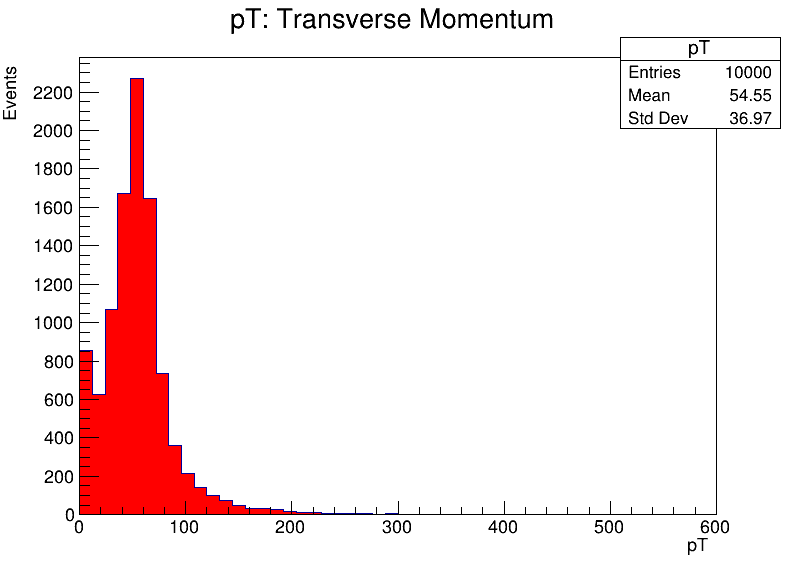

In [8]:
hist_pt->SetFillColor(kRed);
hist_pt->Draw();
canvas->Draw();

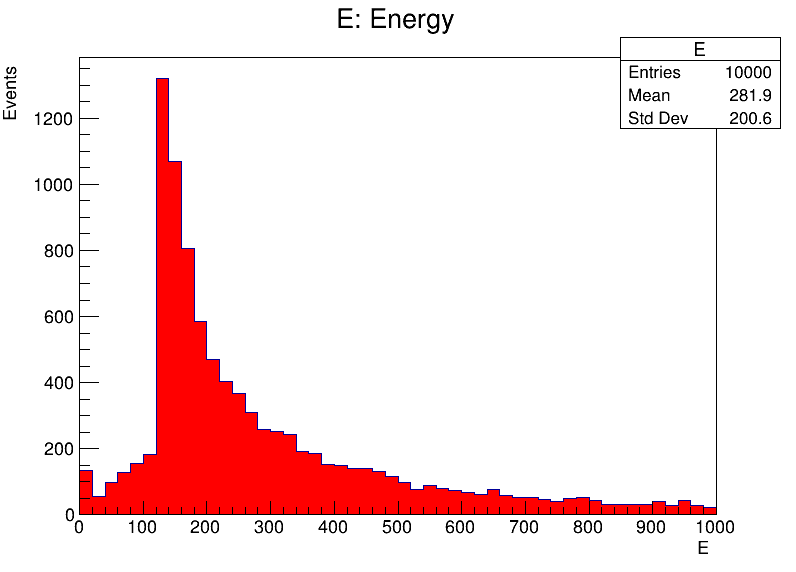

In [9]:
hist_E->SetFillColor(kRed);
hist_E->Draw();
canvas->Draw();

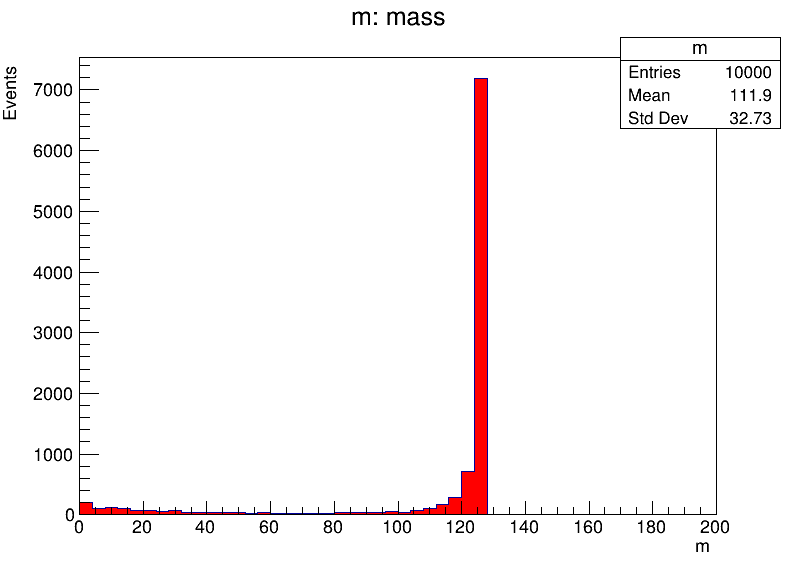

In [10]:
hist_m->SetFillColor(kRed);
hist_m->Draw();
canvas->Draw();

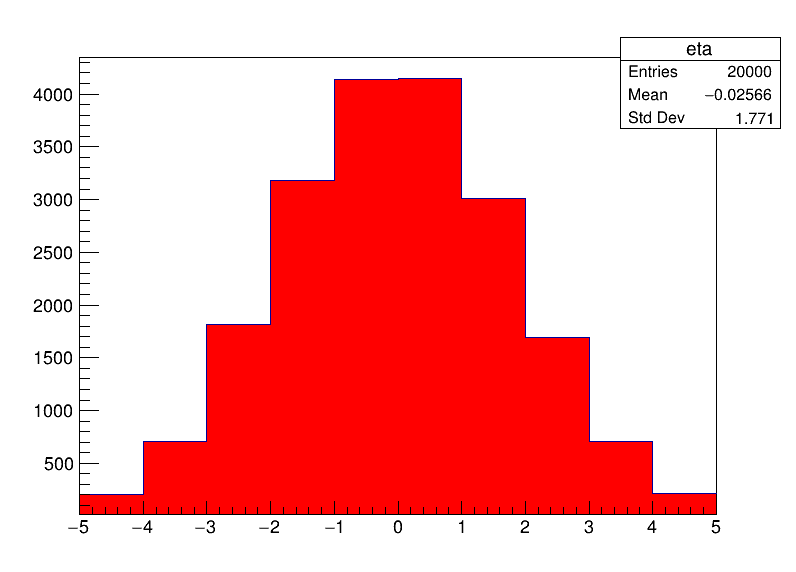

In [11]:
hist_eta->SetFillColor(kRed);
hist_eta->Draw();
canvas->Draw();

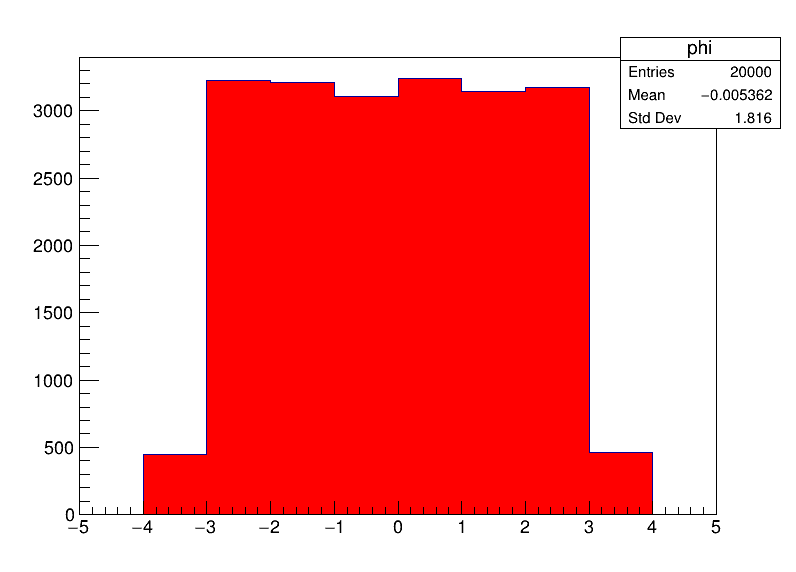

In [12]:
hist_phi->SetFillColor(kRed);
hist_phi->Draw();
canvas->Draw();